In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus']=False
pd.set_option('max_columns',100)

In [2]:
from sklearn.utils import shuffle
df = pd.read_csv('../Data_Clean_Vis/AllData.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df = shuffle(df)
df.head(500)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Lo Salary,Hi Salary,Expected Salary,Area,State,Lo Em,Hi Em,Lo Rev,Hi Rev,BS_R,BS_E
7448,DataScientist,$51K-$79K (Glassdoor est.),Food Scientist Contractor needs 1-year experie...,-1.0,"Global Channel Management, Inc.","Dallas, TX","Austell, GA",Unknown,-1,Company - Public,Unknown,Unknown,Unknown,-1,-1,51000,79000,65000.0,Dallas,TX,-1,-1,-1,-1,Other,Other
3188,DataEngineer,$73K-$126K (Glassdoor est.),"Location:\nPhoenix, AZ\n\nQualification:\nBE/ ...",3.7,Impetus Technologies,"Phoenix, AZ","Los Gatos, CA","1001,5000",1991,Company - Private,Computer Hardware & Software,Information Technology,Unknown,-1,-1,73000,126000,99500.0,Phoenix,AZ,1001,5000,-1,-1,Large,Large
5909,DataScientist,$36K-$71K (Glassdoor est.),Job Description\nSenior Data Engineer\n\nIMMED...,4.0,Irvine Technology Corporation,"Houston, TX","Irvine, CA","201,500",2000,Company - Private,Staffing & Outsourcing,Business Services,"25000000,50000000",-1,-1,36000,71000,53500.0,Houston,TX,201,500,25000000,50000000,Medium,Large
7449,DataScientist,$51K-$79K (Glassdoor est.),Big Data Teradata Hive SalesForce Pega Domain ...,4.0,Lorven Technologies Inc,"Irving, TX","Plainsboro, NJ","1,50",-1,Company - Private,Accounting,Accounting & Legal,Less than1000000,-1,-1,51000,79000,65000.0,Irving,TX,1,50,-1,1000000,Micro,Small
4349,DataEngineer,$52K-$85K (Glassdoor est.),"At BGDS, our vision is to untap the economic w...",-1.0,BuildGroup Data Services,"Austin, TX",Unknown,Unknown,-1,-1,Unknown,Unknown,Unknown,-1,-1,52000,85000,68500.0,Austin,TX,-1,-1,-1,-1,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,DataEngineer,$66K-$113K (Glassdoor est.),Req ID: 97247\n\nNTT DATA Services strives to ...,3.4,NTT DATA Services,"Dallas, TX","Tokyo, Japan",10000+,1967,Company - Public,IT Services,Information Technology,10000000000,"Capgemini, Accenture, Deloitte",-1,66000,113000,89500.0,Dallas,TX,10000,-1,10000000000,10000000000,Large,Other
4541,DataEngineer,$39K-$77K (Glassdoor est.),Job Summary:\n\nProvide IT Compliance and Acce...,3.8,LanceSoft Inc,"Jacksonville, FL","Herndon, VA","1001,5000",2000,Company - Private,Staffing & Outsourcing,Business Services,"100000000,500000000","Mindlance, Artech Information Systems, Pyramid...",-1,39000,77000,58000.0,Jacksonville,FL,1001,5000,100000000,500000000,Large,Large
4501,DataEngineer,$44K-$141K (Glassdoor est.),Title:Reliability EngineerKBR has an immediate...,3.7,KBR,"Orange Park, FL","Houston, TX",10000+,1901,Company - Public,Energy,"Oil, Gas, Energy & Utilities","5000000000,10000000000",-1,-1,44000,141000,92500.0,Orange Park,FL,10000,-1,5000000000,10000000000,Large,Other
4299,DataEngineer,$79K-$96K (Glassdoor est.),"OverviewOBXtek Inc. is an established, award-w...",3.4,OBXtek,"Austin, TX","McLean, VA","501,1000",2009,Company - Private,IT Services,Information Technology,"50000000,100000000",-1,-1,79000,96000,87500.0,Austin,TX,501,1000,50000000,100000000,Large,Large


In [3]:
x_df = df[['Job Title', 'State', 'Area', 'Company Name']]
y_df = df['Expected Salary']

In [4]:
x_df

,Job Title,State,Area,Company Name
7448,DataScientist,TX,Dallas,"Global Channel Management, Inc."
3188,DataEngineer,AZ,Phoenix,Impetus Technologies
5909,DataScientist,TX,Houston,Irvine Technology Corporation
7449,DataScientist,TX,Irving,Lorven Technologies Inc
4349,DataEngineer,TX,Austin,BuildGroup Data Services
...,...,...,...,...
377,DataAnalyst,NY,New York,eTeam Inc.
1183,DataAnalyst,PA,Allegheny West,"Login Consulting Services, Inc"
840,DataAnalyst,IL,Chicago,HR Pundits
958,DataAnalyst,TX,Pearland,Kelsey-Seybold Medical Group


In [5]:
y_df

7448     65000.0
3188     99500.0
5909     53500.0
7449     65000.0
4349     68500.0
          ...   
377     106000.0
1183     71500.0
840     113000.0
958      98500.0
8412     98000.0
Name: Expected Salary, Length: 8690, dtype: float64

In [6]:
from sklearn.preprocessing import LabelEncoder
x_df = x_df.apply(LabelEncoder().fit_transform)
x_df

,Job Title,State,Area,Company Name
7448,2,15,72,1281
3188,1,0,226,1507
5909,2,15,135,1594
7449,2,15,140,1826
4349,1,15,15,500
...,...,...,...,...
377,0,11,201,3485
1183,0,13,4,1819
840,0,6,62,1353
958,0,15,223,1679


## Linear Regression

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.4, random_state=17)

In [8]:
from sklearn import metrics

def print_evaluation(t, p):
    mae = metrics.mean_absolute_error(t, p)
    mse = metrics.mean_squared_error(t, p)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(t, p)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)

def evaluate(t, p):
    mae = metrics.mean_absolute_error(t, p)
    mse = metrics.mean_squared_error(t, p)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(t, p)
    return mae,mse,rmse,r2

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train, y_train)

LinearRegression(normalize=True)

In [10]:
print(lin_reg.intercept_)

83404.90700635416


In [11]:
coeff_df = pd.DataFrame(lin_reg.coef_, x_df.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Job Title,16548.833991
State,-1513.880616
Area,36.826034
Company Name,-0.163705


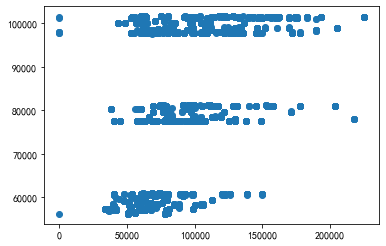

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

pred = lin_reg.predict(x_test)
plt.scatter(y_test, pred)

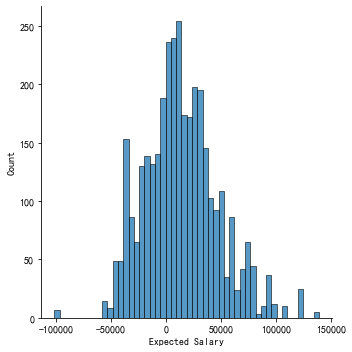

In [13]:
sns.displot((y_test - pred), bins=50)

In [14]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

print('test set evaluation:\n')
print_evaluation(y_test, test_pred)
print('========================================')
print('train set evaluation:\n')
print_evaluation(y_train, train_pred)

test set evaluation:

MAE:  27900.22845121756
MSE:  1317281960.598708
RMSE:  36294.379187399085
R2:  0.04363498399816523
train set evaluation:

MAE:  27706.59621121515
MSE:  1308711492.7418091
RMSE:  36176.117712405365
R2:  0.012558956107848074


In [15]:
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x_df, y_df, cv=5, scoring='r2')
    return pred


evaluate_df = pd.DataFrame(data=[['Linear Regression', *evaluate(y_test, test_pred), cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2', 'Cross Validation'])

evaluate_df

,Model,MAE,MSE,RMSE,R2,Cross Validation
0,Linear Regression,27900.228451,1.317282e+09,36294.379187,0.043635,"[0.2338429041555221, 0.22936540695539076, 0.21..."


## Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=6)

x_train_pr = poly_reg.fit_transform(x_train)
x_test_pr = poly_reg.transform(x_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train_pr, y_train)

test_pred = lin_reg.predict(x_test_pr)
train_pred = lin_reg.predict(x_train_pr)

print('test set evaluation:\n')
print_evaluation(y_test, test_pred)
print('========================================')
print('train set evaluation:\n')
print_evaluation(y_train, train_pred)

test set evaluation:

MAE:  22637.567031070197
MSE:  861159403.4267837
RMSE:  29345.517603661105
R2:  0.3747863014353692
train set evaluation:

MAE:  21544.871499808207
MSE:  797147804.789509
RMSE:  28233.80606275939
R2:  0.39854088172741264


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=700, min_samples_leaf=20)
rf_reg.fit(x_train, y_train)

test_pred = rf_reg.predict(x_test)
train_pred = rf_reg.predict(x_train)

print('test set evaluation:\n')
print_evaluation(y_test, test_pred)
print('========================================')
print('train set evaluation:\n')
print_evaluation(y_train, train_pred)

test set evaluation:

MAE:  21269.4118872131
MSE:  767122344.9392651
RMSE:  27696.97357003586
R2:  0.44305851318288747
train set evaluation:

MAE:  19993.638181209277
MSE:  689403731.4005586
RMSE:  26256.498841249922
R2:  0.4798352853377027


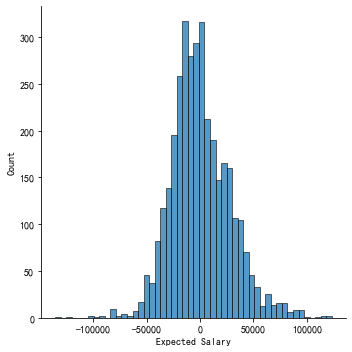

In [18]:
sns.displot((y_test - test_pred), bins=50)

In [19]:
evaluate_df = pd.DataFrame(data=[['RF', *evaluate(y_test, test_pred), cross_val(RandomForestRegressor())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2', 'Cross Validation'])

evaluate_df

,Model,MAE,MSE,RMSE,R2,Cross Validation
0,RF,21269.411887,7.671223e+08,27696.97357,0.443059,"[0.3377073643252523, 0.30397626522875987, 0.25..."


## Gradient boost

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=17)

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 1500,
          'max_depth': 5,
          'min_samples_split': 7,
          'learning_rate': 0.01,
          'loss': 'huber'}

gb_reg = GradientBoostingRegressor(**params)
gb_reg.fit(x_train, y_train)

test_pred = gb_reg.predict(x_test)
train_pred = gb_reg.predict(x_train)

print('test set evaluation:\n')
print_evaluation(y_test, test_pred)
print('========================================')
print('train set evaluation:\n')
print_evaluation(y_train, train_pred)

test set evaluation:

MAE:  21359.874123378682
MSE:  802563128.1046164
RMSE:  28329.54514468272
R2:  0.4189589125753129
train set evaluation:

MAE:  18429.84661666567
MSE:  618252000.4082841
RMSE:  24864.673744255808
R2:  0.535542166485692


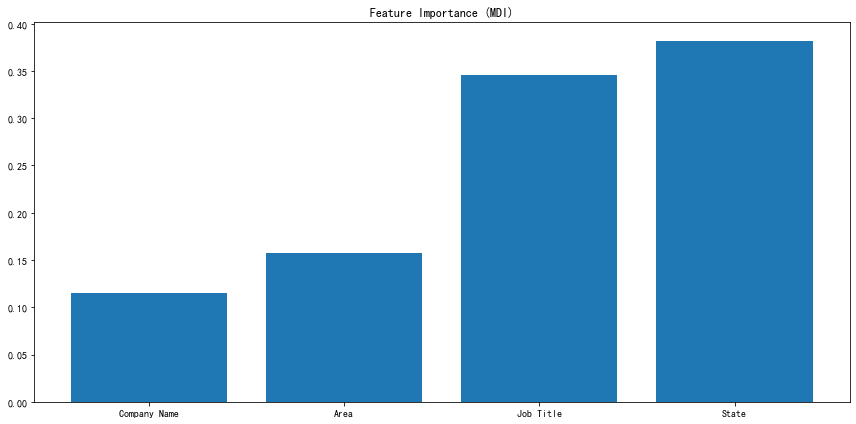

In [22]:
feature_importance = gb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.bar(pos, feature_importance[sorted_idx], align='center')
plt.xticks(pos, np.array(x_df.columns)[sorted_idx])
ax.set_title('Feature Importance (MDI)')
fig.tight_layout()
plt.show()